In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
dataset['price']

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [12]:
# getting the dependent and the independent columns using iloc
#[all rows, list of columns] - format for the iloc for splitting the data
x = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [13]:
display(x)   # getting the data in the x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
display(y)  # getting the data in the y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


Finding the missing values and the null values

In [17]:
# finding the missing values using isNull
x.isna().sum()

,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0
parking,0


As we can see there are no missing values in the dataset, hence we now use encoding to encode the categorical data in the dataset

In [18]:
# getting the data type of the columns in the dataset
x.dtypes

,0
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object
parking,int64


In [24]:
# encoding the categorical data from the dataset
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
labelEncoder = LabelEncoder()

for col in x.columns:  # this gives us the names of the columns
  if x[col].dtypes == "object":
    x[col] = labelEncoder.fit_transform(x[col])

display(x)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [25]:
x.dtypes  # checking if the encoding has worked or not

,0
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64
parking,int64


Handling missing values and encoding in the dependant variable

In [26]:
y.isna().sum()   # checking for the missing values

0

In [27]:
y.dtypes # checking for the data types

dtype('int64')

bedrooms            1.000000
stories             0.408564
bathrooms           0.373930
airconditioning     0.160603
area                0.151858
parking             0.139270
furnishingstatus    0.123244
basement            0.097312
guestroom           0.080549
prefarea            0.079023
hotwaterheating     0.046049
mainroad            0.012033
Name: bedrooms, dtype: float64


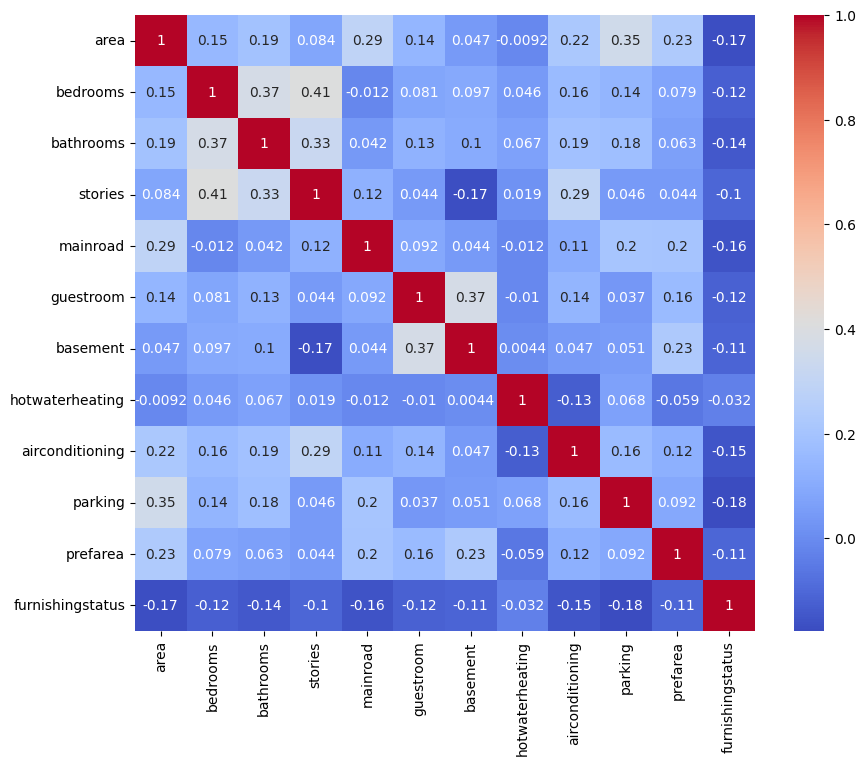

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = x.corr()

# Correlation with the target variable (assuming the target column is named "target")
corr_with_target = corr_matrix["bedrooms"].abs().sort_values(ascending=False)
print(corr_with_target)

# Visualize correlations with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


Correlation of each feature with the target variable Price:
 area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: target, dtype: float64


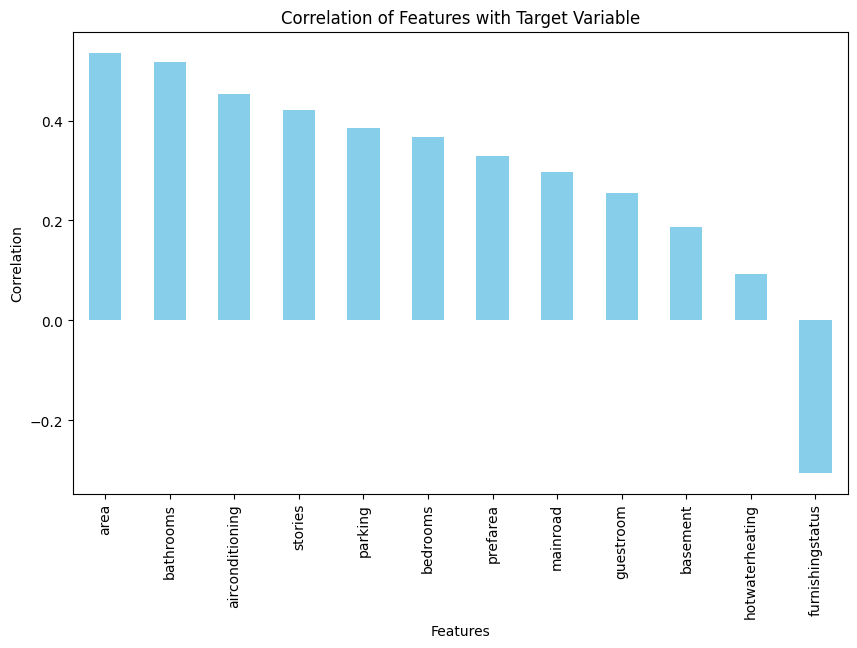

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x is your feature DataFrame and y is the target variable
# Combine x and y into a single DataFrame for easier correlation calculation
data = pd.concat([x, y.rename("target")], axis=1)

# Compute correlation of each feature in x with y (target variable)
corr_with_target = data.corr()["target"].drop("target").sort_values(ascending=False)
print("Correlation of each feature with the target variable Price:\n", corr_with_target)

# Visualize correlation with a bar plot
plt.figure(figsize=(10, 6))
corr_with_target.plot(kind="bar", color="skyblue")
plt.title("Correlation of Features with Target Variable")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()


*According to the above, we can conclude that only bedrooms, parking, stories, air conditioning, bathrooms and area will be enough for making accurate price predictions in the dataset*

In [34]:
# getting the x with the only features we need
display(x)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [35]:
important_columns = ["area", "bathrooms", "stories", "airconditioning", "parking", "bedrooms"]
new_data = x[important_columns]
display(new_data)

,area,bathrooms,stories,airconditioning,parking,bedrooms
0,7420,2,3,1,2,4
1,8960,4,4,1,3,4
2,9960,2,2,0,2,3
3,7500,2,2,1,3,4
4,7420,1,2,1,2,4
...,...,...,...,...,...,...
540,3000,1,1,0,2,2
541,2400,1,1,0,0,3
542,3620,1,1,0,0,2
543,2910,1,1,0,0,3


Generating the Model for making the predictions

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.2, random_state = 1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = regressor.predict(X_test)
print(y_pred)

[6736633.46028862 7060908.30410686 7228694.26267063 4877934.57445086
 4481298.87364801 3032520.62099812 3272975.78843965 7133281.75974557
 2775921.12736831 4743355.47198914 3693930.51382794 4093633.15568336
 5138565.62004961 4509649.45020238 6184309.74283687 7868391.13014157
 4635095.85788217 3716785.93734426 5773668.15871468 3046491.03787352
 3776527.9449216  5666203.82904876 5949660.39056204 3501944.13962759
 4987556.09570733 6398921.26659976 3204549.25680504 7352387.61703531
 7364456.1158125  3659086.97970929 7195278.58549035 6862906.65675022
 4310966.41705996 4606284.26895613 6843170.42899837 3276622.17836548
 5314640.17566581 3836964.45761852 5252609.83944063 5463081.47142146
 4598610.86490769 3930572.26906432 3510497.45608192 4866037.63579933
 5884929.22854944 3246353.53235629 4360209.28485955 3606555.1301584
 3441409.15180519 3692968.20710755 5347842.32147428 4562417.24878084
 3004009.56615036 3380440.11810558 5594029.60748716 4023696.44334152
 3313686.54966756 4341131.458872   

In [41]:
y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=["Predictions"])
prediction_data = pd.concat([X_test, y_pred_df],axis=1)
prediction_data

,area,bathrooms,stories,airconditioning,parking,bedrooms,Predictions
62,6240,2,2,1,1,4,6.736633e+06
247,8400,1,4,0,3,4,7.060908e+06
142,10500,2,2,0,1,4,7.228694e+06
107,6420,1,3,0,0,3,4.877935e+06
483,6615,1,2,0,0,3,4.481299e+06
...,...,...,...,...,...,...,...
201,4095,1,2,1,0,3,4.485330e+06
92,4800,2,4,1,0,3,6.750506e+06
66,13200,1,1,0,1,2,6.112677e+06
284,7770,1,1,0,1,2,4.564527e+06


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 942380.7060423385
Mean Squared Error (MSE): 1703356222493.3247
Root Mean Squared Error (RMSE): 1305126.8989999879
R-squared (R²): 0.5943612963335301


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
